In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# load results
def load_results(filepath, model_name):
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # flatten the per_label metrics dictionary
    flat_data = {
        'model': model_name,
        'macro_precision': data['macro_precision'],
        'macro_recall': data['macro_recall'],
        'macro_f1': data['macro_f1'],
        'macro_auc_pr': data['macro_auc_pr'],
    }
    
    # add per-label metrics as separate columns
    for label, value in data['per_label_auc_pr'].items():
        flat_data[f'per_label_auc_pr_{label}'] = value
    
    return flat_data

bert_results = load_results('../results/bert_results.json', 'BERT')
logistic_results = load_results('../results/logistic_regression_results.json', 'Logistic Regression')
linear_svm_results = load_results('../results/linear_svm_results.json', 'Linear SVM')

results = pd.DataFrame([bert_results, logistic_results, linear_svm_results])

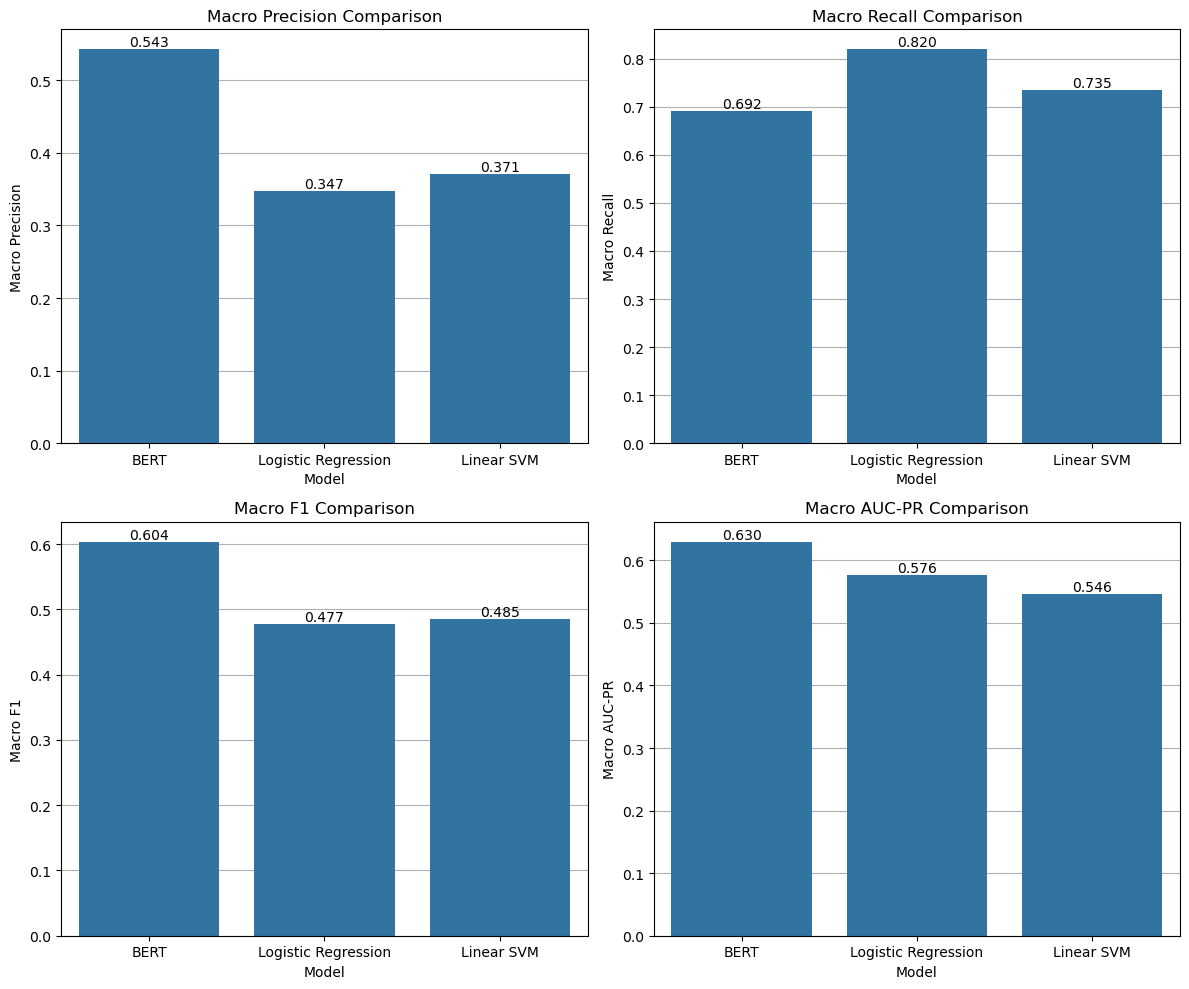

In [53]:
# compare precision, recall, f1, auc-pr (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# precision
sns.barplot(x='model', y='macro_precision', data=results, ax=axes[0, 0])
axes[0, 0].set_title('Macro Precision Comparison')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Macro Precision')
axes[0, 0].set_axisbelow(True)
axes[0, 0].grid(axis='y')
axes[0, 0].bar_label(axes[0, 0].containers[0], fmt='%.3f')

# recall
sns.barplot(x='model', y='macro_recall', data=results, ax=axes[0, 1])
axes[0, 1].set_title('Macro Recall Comparison')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Macro Recall')
axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(axis='y')
axes[0, 1].bar_label(axes[0, 1].containers[0], fmt='%.3f')

# f1
sns.barplot(x='model', y='macro_f1', data=results, ax=axes[1, 0])
axes[1, 0].set_title('Macro F1 Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Macro F1')
axes[1, 0].set_axisbelow(True)
axes[1, 0].grid(axis='y')
axes[1, 0].bar_label(axes[1, 0].containers[0], fmt='%.3f')

# auc-pr
sns.barplot(x='model', y='macro_auc_pr', data=results, ax=axes[1, 1])
axes[1, 1].set_title('Macro AUC-PR Comparison')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Macro AUC-PR')
axes[1, 1].set_axisbelow(True)
axes[1, 1].grid(axis='y')
axes[1, 1].bar_label(axes[1, 1].containers[0], fmt='%.3f')

plt.tight_layout()
plt.show()

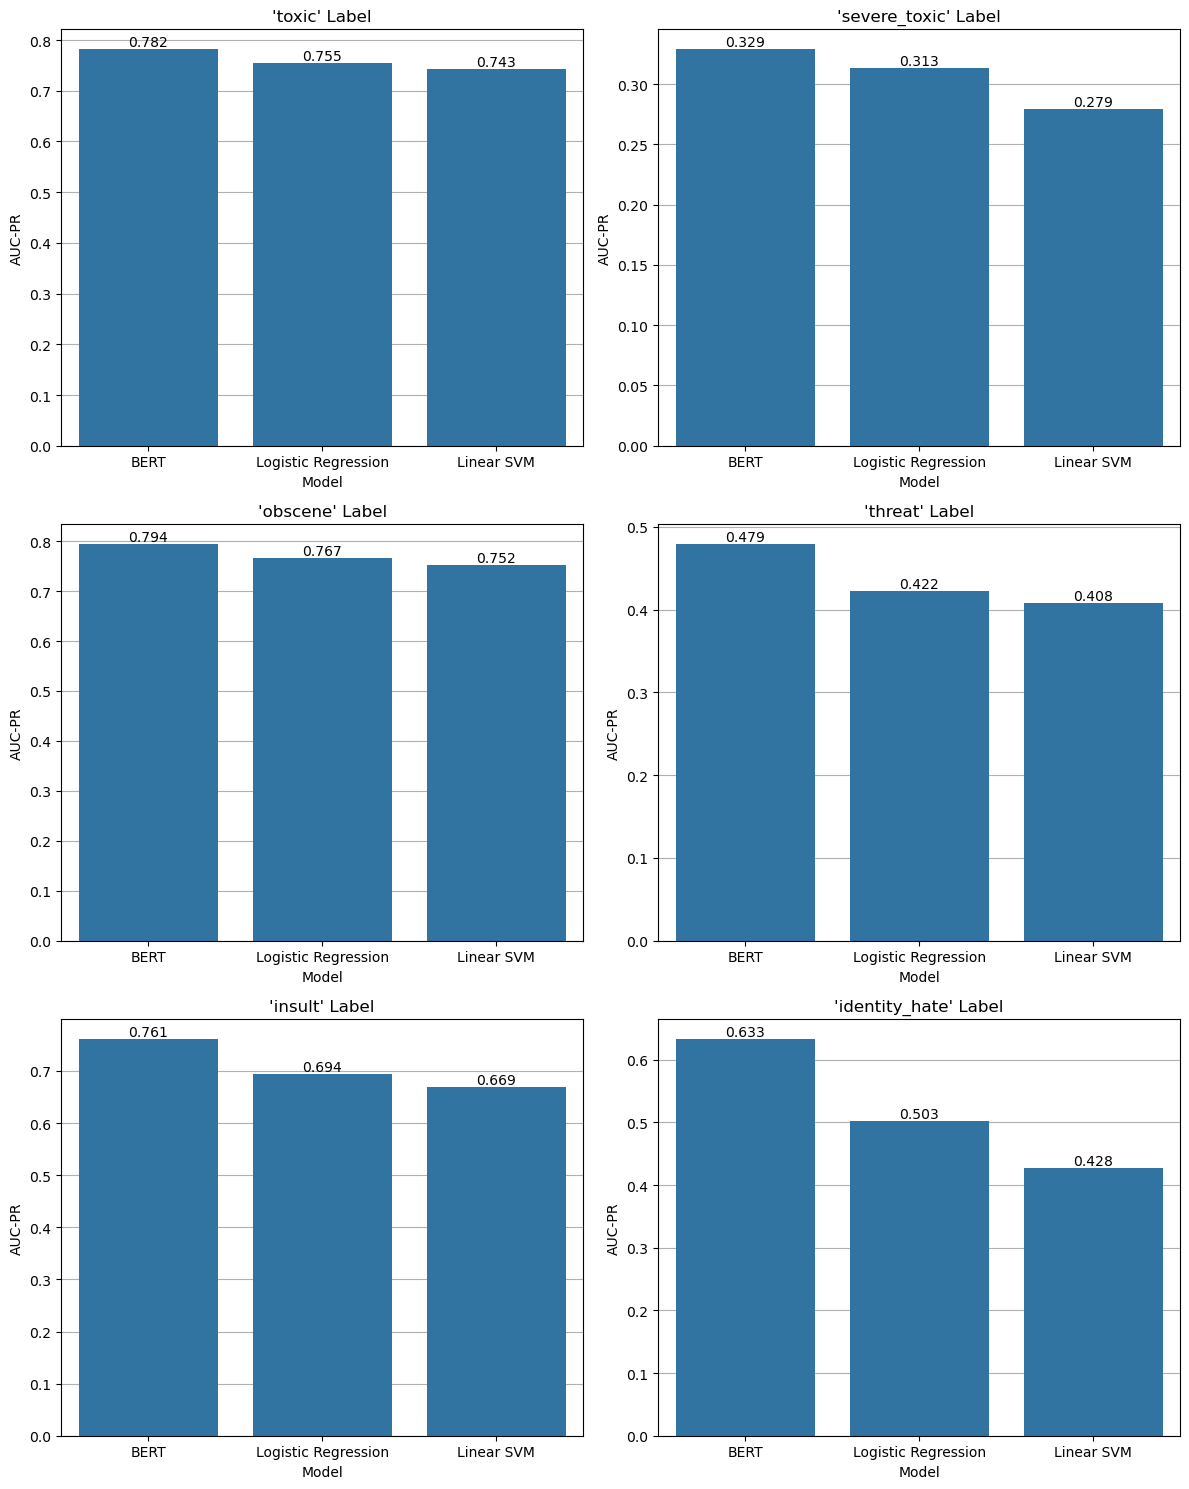

In [54]:
# compare per-label auc-pr
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, label in enumerate(labels):
    ax = axes[i//2, i%2]
    sns.barplot(x='model', y=f'per_label_auc_pr_{label}', data=results, ax=ax)
    ax.set_title(f'\'{label}\' Label')
    ax.set_xlabel('Model')
    ax.set_ylabel('AUC-PR')
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.bar_label(ax.containers[0], fmt='%.3f')

plt.tight_layout()
plt.show()

In [55]:
# best model for each metric
print("=== Best Model for Each Metric ===\n")

metrics = ['macro_precision', 'macro_recall', 'macro_f1', 'macro_auc_pr']
for metric in metrics:
    best_row = results.sort_values(by=metric, ascending=False).iloc[0]
    print(f"{metric:<17} {best_row['model']:<20} ({best_row[metric]:.3f})")

print("\n=== Best Model for Per-Label AUC-PR ===\n")
for label in labels:
    col = f'per_label_auc_pr_{label}'
    best_row = results.sort_values(by=col, ascending=False).iloc[0]
    print(f"{label:<17} {best_row['model']:<20} ({best_row[col]:.3f})")


=== Best Model for Each Metric ===

macro_precision   BERT                 (0.543)
macro_recall      Logistic Regression  (0.820)
macro_f1          BERT                 (0.604)
macro_auc_pr      BERT                 (0.630)

=== Best Model for Per-Label AUC-PR ===

toxic             BERT                 (0.782)
severe_toxic      BERT                 (0.329)
obscene           BERT                 (0.794)
threat            BERT                 (0.479)
insult            BERT                 (0.761)
identity_hate     BERT                 (0.633)
